#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Dataset

In [6]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [9]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    print("True")
else:
    print("false")

True


Periksa apakah ada missing values

In [10]:
missing_values = df.isna().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

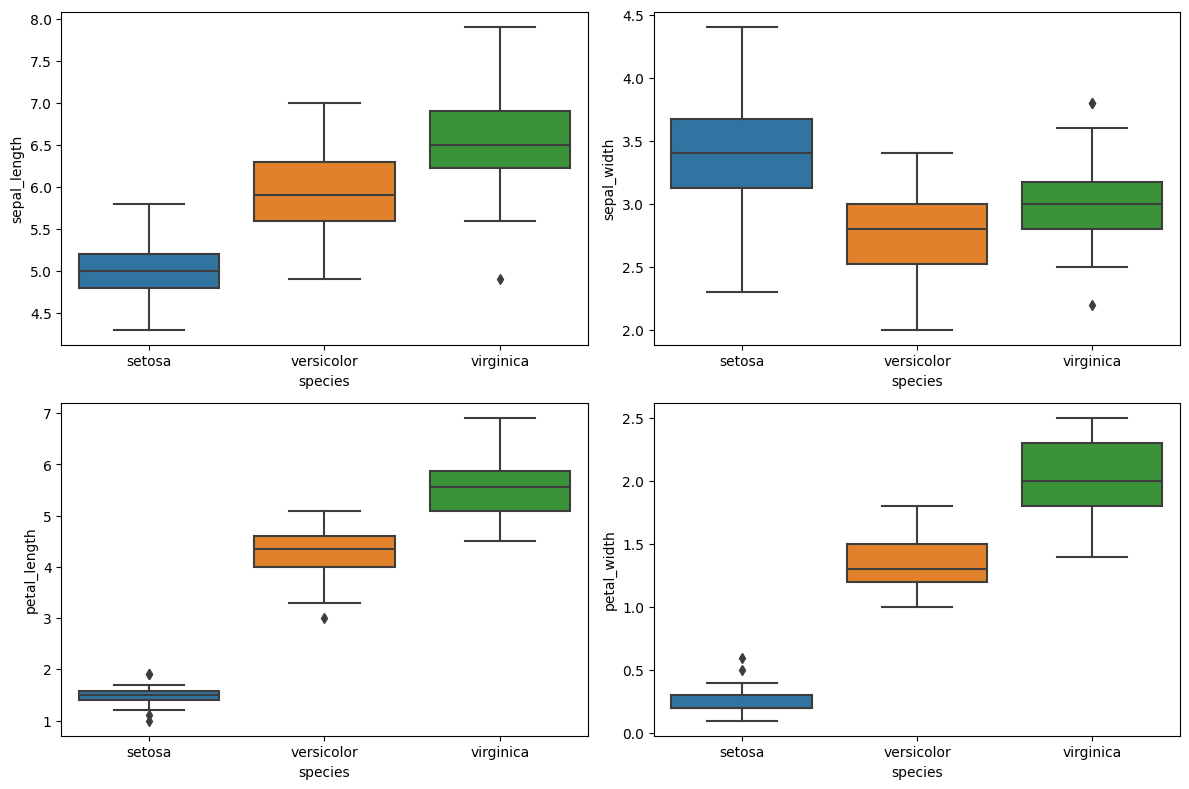

In [23]:
plt.figure(figsize=(12, 8))

# sepal_length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df)

# sepal_width
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df)

# petal_length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df)

# petal_width
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df)

# jarak antar subplot
plt.tight_layout()

plt.show()


Pisahkan dataset menjadi variabel independen dan variabel dependen

In [48]:
X = df.drop("species", axis=1)
y = df["species"]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [51]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(logistic_model)

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [52]:
y_pred_test = logistic_model.predict(X_test_scaled)
print(y_pred_test)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


In [75]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [56]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

print(model)

GaussianNB()


Uji hasil model dengan data test

In [57]:
y_pred = model.predict(X_test_scaled)

print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [59]:
y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy: 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [61]:
knn_model = KNeighborsClassifier(metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

print(knn_model)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [64]:
y_pred_knn = knn_model.predict(X_test_scaled)

print(y_pred_knn)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [74]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_knn)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [73]:
print('Kesimpulan Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) memiliki nilai akurasi yang sama dengan akurasi 1.00')

Kesimpulan Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) memiliki nilai akurasi yang sama dengan akurasi 1.00
